In [74]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
import gym
import numpy as np
import time, os

In [121]:
import gym_bandits
env = gym.make('BanditTenArmedGaussian-v0')

In [221]:
## defining global vars

epsilon = 0.01
# min_epsilon = 0.1
# max_epsilon = 1.0
# decay_rate = 0.01

total_episodes = 20
max_steps = 6000
#lr_rate = 0.81

stepsize = lr_rate = 0.1
#gamma = 0.96

## state values

In [222]:
## random choice
def choose_action(Q, state):
	action=0
	if np.random.uniform(0, 1) < epsilon:
		action = env.action_space.sample()
	else:
		action = np.argmax(Q[state, :])
	return action

In [223]:
## simple learn function ... with side effect on Q estimate
def learn(Q, state, reward, action, n):
    predict = Q[state, action]
    target = reward #+ gamma * Q[state2, action2]
    new_reward = Q[state, action] + (1.0/(n+1)) * (target - predict)
    #new_reward = Q[state, action] + 0.1 * (target - predict)
    return new_reward



In [224]:
# Start
rewards=0

Q = np.zeros((env.observation_space.n, env.action_space.n))


In [225]:
for episode in range(total_episodes):
    t = 0
    state = env.reset()
    action = choose_action(Q, state)
    Qs = np.zeros(max_steps)
    while t < max_steps:
        #env.render()
        state, reward, done, info = env.step(action)
        action = choose_action(Q,state)
        new_reward = learn(Q, state, reward, action, t)
        Qs[t] += new_reward/total_episodes
        Q[state, action] = new_reward

        t += 1
        rewards+=1
        # epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode) 
        # os.system('clear')
        #time.sleep(0.1)
    

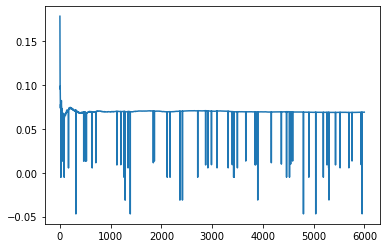

In [226]:
import matplotlib.pyplot as plt
plt.plot(Qs)

In [191]:
Qs

array([-0.96583957, -0.54736444,  0.0029174 , ...,  0.37578209,
        0.375795  ,  0.37563427])